In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy


#

In [2]:
data=fashion_mnist.load_data()

In [3]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
classes={0:'T-shirt',
         1:'Trousers',
         2:'pullover',
         3:'Dress',
         4:'Coat',
         5:'Sandal',
         6:'shirt',
         7:'Sneakers',
         8:'Bag',
         9:'Ankle root'}

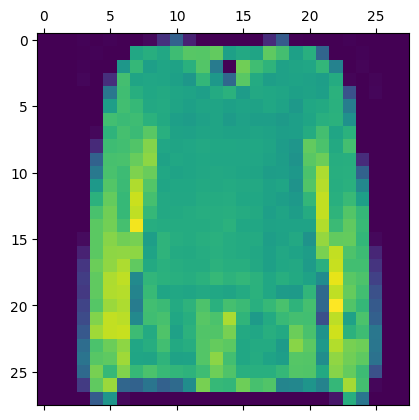

In [6]:
plt.matshow(x_train[18])

In [7]:
classes[y_train[18]]

'shirt'

In [8]:
#(batch_size,rows,columns,channels)
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
#x_train=x_train.reshape((6000,28,28,1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
#x_test=x_test.reshape((1000,28,28,1))
x_train.shape

(60000, 28, 28, 1)

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         102,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,578 (474.91 KB)

 Trainable params: 121,578 (474.91 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
training_history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.5834 - loss: 1.5549 - val_accuracy: 0.8116 - val_loss: 0.4912
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8277 - loss: 0.4592 - val_accuracy: 0.8622 - val_loss: 0.3862
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8584 - loss: 0.3894 - val_accuracy: 0.8749 - val_loss: 0.3493
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8727 - loss: 0.3504 - val_accuracy: 0.8764 - val_loss: 0.3457
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8813 - loss: 0.3232 - val_accuracy: 0.8872 - val_loss: 0.3153
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8836 - loss: 0.3151 - val_accuracy: 0.8886 - val_loss: 0.3059
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8902 - loss: 0.2949 - val_accuracy: 0.8934 - val_loss: 0.2959
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8924 - loss: 0.2896 

In [13]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
hist['val_accuracy'][-1]

0.89410001039505

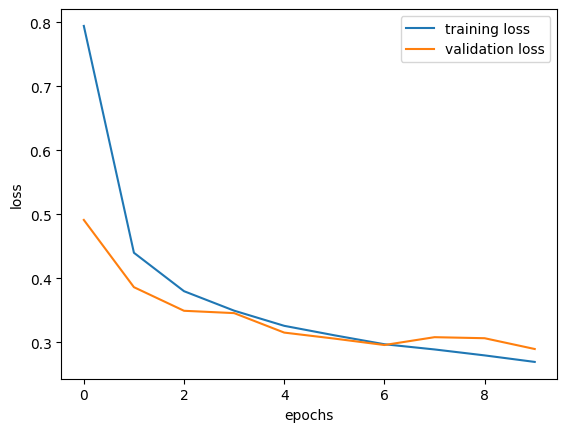

In [16]:
plt.plot(hist['loss'],label='training loss')
plt.plot(hist['val_loss'],label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

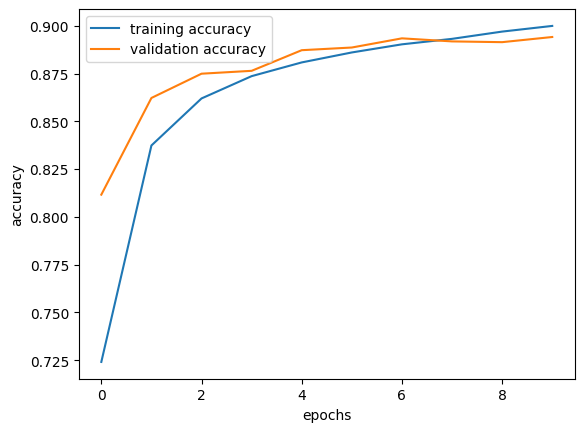

In [17]:
plt.plot(hist['accuracy'],label='training accuracy')
plt.plot(hist['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [18]:
def predict(index):
  plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
  predict_img=x_test[index].reshape((1,28,28,1))
  predict_prob=model.predict(predict_img)
  predict_class=np.argmax(predict_prob)
  print('predicted class:',classes[predict_class])
  print('actual class:',classes[int(y_test[index])])
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
predicted class: pullover
actual class: pullover


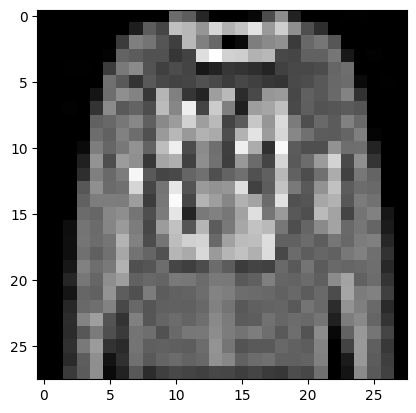

In [22]:
predict(500)